In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график.

Рассчитать коэффициенты корреляции Пирсона и Спирмена.

Построить модель линейной регрессии.

Рассчитать коэффициент детерминации.

Вывести график остатков.

In [2]:
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


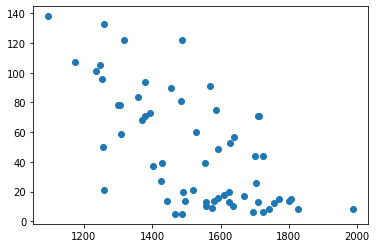

In [7]:
plt.scatter(data['mortality'], data['hardness'])

In [10]:
pearson = data[['mortality','hardness']].corr()
spearman = data[['mortality', 'hardness']].corr(method = 'spearman')

In [14]:
print('К-т корреляции Пирсона')
pearson

К-т корреляции Пирсона


,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [15]:
print('К-т корреляции Спирмена')
spearman

К-т корреляции Спирмена


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [33]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = data[['mortality']].values
X = sm.add_constant(X)
Y = data['hardness'].values

In [34]:
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        22:20:44   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [38]:
print('Параметры', result.params)
print('R2:', result.rsquared)

Параметры [ 2.49776928e+02 -1.32924533e-01]
R2: 0.42882671931249716


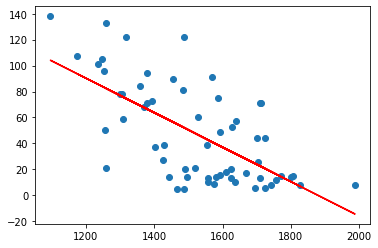

In [42]:
plt.scatter(data['mortality'], data['hardness'])
plt.plot(data['mortality'], result.fittedvalues, c= 'r')

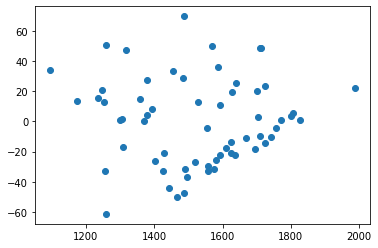

In [45]:
plt.scatter(data['mortality'], result.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

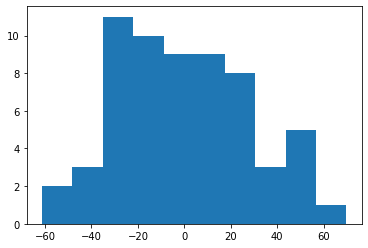

In [46]:
plt.hist(result.resid)

##### Вывод по общей модели:
Несмотря на достаточно высокие к-ты корреляции (~0.65), полученная модель достаточно слабо соответствует данным (R2 = 0.428), т.е. зависимости между жесткостью воды и смертностью нет.

#### 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

###### Южные города

In [48]:
data_south = data[data.location == 'South']
data_south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


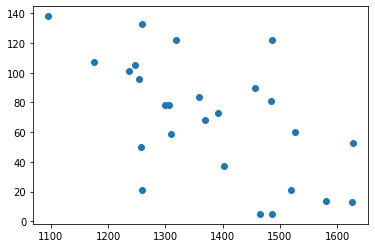

In [49]:
plt.scatter(data_south['mortality'], data_south['hardness'])

In [51]:
pearson_south = data_south[['mortality','hardness']].corr()
spearman_south = data_south[['mortality', 'hardness']].corr(method = 'spearman')

In [52]:
print('К-т корреляции Пирсона')
pearson_south

К-т корреляции Пирсона


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [53]:
print('К-т корреляции Спирмена')
spearman_south

К-т корреляции Спирмена


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [54]:
X_south = data_south[['mortality']].values
X_south = sm.add_constant(X_south)
Y_south = data_south['hardness'].values

In [56]:
model_south = sm.OLS(Y_south,X_south)
result_south = model_south.fit()
print(result_south.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 27 Sep 2020   Prob (F-statistic):            0.00113
Time:                        22:40:47   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

In [60]:
print('Параметры', result_south.params)
print('R2:', result_south.rsquared)

Параметры [ 3.08317671e+02 -1.73261990e-01]
R2: 0.3625885624364602


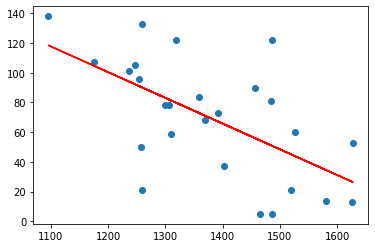

In [62]:
plt.scatter(data_south['mortality'], data_south['hardness'])
plt.plot(data_south['mortality'], result_south.fittedvalues, c= 'r')

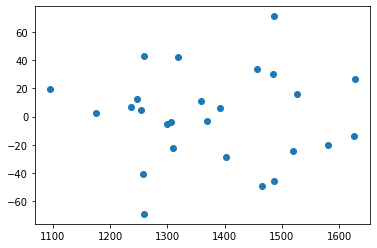

In [64]:
plt.scatter(data_south['mortality'], result_south.resid)

(array([1., 2., 2., 4., 3., 6., 3., 4., 0., 1.]),
 array([-69.00756398, -54.99184301, -40.97612203, -26.96040106,
        -12.94468009,   1.07104088,  15.08676186,  29.10248283,
         43.1182038 ,  57.13392477,  71.14964575]),
 <a list of 10 Patch objects>)

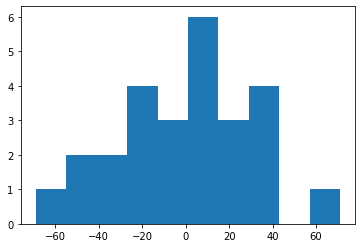

In [65]:
plt.hist(result_south.resid)

###### Северные города

In [67]:
data_north = data[data.location == 'North']
data_north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


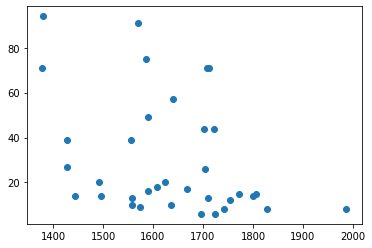

In [68]:
plt.scatter(data_north['mortality'], data_north['hardness'])

In [69]:
pearson_north = data_north[['mortality','hardness']].corr()
spearman_north = data_north[['mortality', 'hardness']].corr(method = 'spearman')

In [72]:
print('К-т корреляции Пирсона')
pearson_north

К-т корреляции Пирсона


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [73]:
print('К-т корреляции Спирмена')
spearman_north

К-т корреляции Спирмена


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [74]:
X_north = data_north[['mortality']].values
X_north = sm.add_constant(X_north)
Y_north = data_north['hardness'].values

In [75]:
model_north = sm.OLS(Y_north,X_north)
result_north = model_north.fit()
print(result_north.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sun, 27 Sep 2020   Prob (F-statistic):             0.0293
Time:                        22:47:49   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

In [76]:
print('Параметры', result_north.params)
print('R2:', result_north.rsquared)

Параметры [ 1.45319062e+02 -7.03471243e-02]
R2: 0.1358643664207171


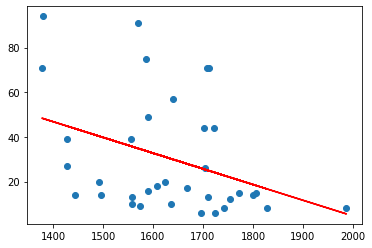

In [77]:
plt.scatter(data_north['mortality'], data_north['hardness'])
plt.plot(data_north['mortality'], result_north.fittedvalues, c= 'r')

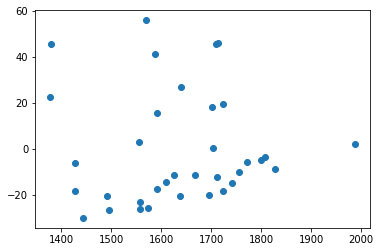

In [78]:
plt.scatter(data_north['mortality'], result_north.resid)

(array([5., 8., 8., 4., 0., 3., 2., 0., 4., 1.]),
 array([-29.73781476, -21.15847571, -12.57913666,  -3.9997976 ,
          4.57954145,  13.1588805 ,  21.73821956,  30.31755861,
         38.89689766,  47.47623672,  56.05557577]),
 <a list of 10 Patch objects>)

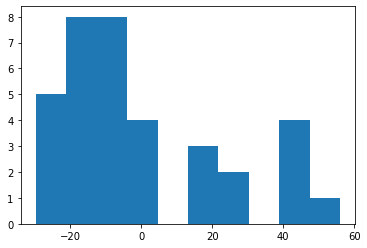

In [79]:
plt.hist(result_north.resid)

###### Выводы:
Мы видим снижение результатов при разделении на 2 группы: у южных городов корреляция между данными показателями выше, чем у северных, но все равно ниже, чем у общей модели.
Модель регрессии по южным городам еще хуже, чем общая модель R2 = 0.363, т.е. связь между показателями достаточно слаба.
У северных городов связь практически отсутствует. R2 = 0.136